In [73]:
%%html
<style type="text/css">
  span.ecb { background: yellow; }
</style>

<span class="ecb">Comments by ECB</span>

# ATMO 5331 - Homework 2 - Fall 2023
## Due 24 Sep, 2023 (Sunday, 11:59 pm)

When doing this homework, remember that you have three jobs:
1. Make it work and get the right answer.
2. Clean it up so that I can understand what you've done. If you think I might not undersand, document it with a comment or a function docstring.
3. Practice _generalizing_ your thinking: write code that is tolerant of changes to the specifics of a problem, but not the structure of the problem.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in pairs. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring there is an even contribution by your partner.
**Question 1**

Grab the [WGS84 implementation manual](https://www.icao.int/safety/pbn/documentation/eurocontrol/eurocontrol%20wgs%2084%20implementation%20manual.pdf), and implement a translation from geodetic latitude, longitude, and altitude (referenced to the WGS84 ellisoid) to the local XYZ cartesian system used for WGS84.

Use part 1 of Helmert's formula on p. 81 (Appendix E), and refer to Fig. B-6 in Appendix B (p. 70) for information about the coordinate system notation.

Careful with degrees and radians.

Compare your results to what you get when using the `proj4` library. This library has its origins in public domain code written by the USGS, and is used in many open source packages, including the QGIS system. For easy use of the `proj4` library, we will use the helper routines in `coords.py`. I use these same helpers all the time in practice, and this code is running in operations in NOAA.

You set up a coordinate system transform object as shown below. It defaults to a WGS84 ellipsoid, so we don't have to specify that. Once the coordinate system object `geo` has been created, you can reuse it withouth calling `GeographicSystem()` again. It accepts arrays of data.
```
from coords import GeographicSystem 
geo = GeographicSystem() 
X, Y, Z = geo.toECEF(lon, lat, alt) # Use degrees
```

For your dataset, please use: 
```
import numpy as np
lat = np.array([  33.5,   1.0,   0.0,   0.0,   0.0,  10.0, -10.0]) 
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0]) 
alt = np.zeros_like(lat)
```

Demonstrate that your ECEF conversion equals that provided by the coordinate system library.


**Question 1**

Grab the [WGS84 implementation manual](https://www.icao.int/safety/pbn/documentation/eurocontrol/eurocontrol%20wgs%2084%20implementation%20manual.pdf), and implement a translation from geodetic latitude, longitude, and altitude (referenced to the WGS84 ellisoid) to the local XYZ cartesian system used for WGS84.

Use part 1 of Helmert's formula on p. 81 (Appendix E), and refer to Fig. B-6 in Appendix B (p. 70) for information about the coordinate system notation.

Careful with degrees and radians.

Compare your results to what you get when using the `proj4` library. This library has its origins in public domain code written by the USGS, and is used in many open source packages, including the QGIS system. For easy use of the `proj4` library, we will use the helper routines in `coords.py`. I use these same helpers all the time in practice, and this code is running in operations in NOAA.

You set up a coordinate system transform object as shown below. It defaults to a WGS84 ellipsoid, so we don't have to specify that. Once the coordinate system object `geo` has been created, you can reuse it withouth calling `GeographicSystem()` again. It accepts arrays of data.
```
from coords import GeographicSystem 
geo = GeographicSystem() 
X, Y, Z = geo.toECEF(lon, lat, alt) # Use degrees
```

For your dataset, please use: 
```
import numpy as np
lat = np.array([  33.5,   1.0,   0.0,   0.0,   0.0,  10.0, -10.0]) 
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0]) 
alt = np.zeros_like(lat)
```

Demonstrate that your ECEF conversion equals that provided by the coordinate system library.


In [74]:
import numpy as np
lat = np.array([  33.5,   1.0,   0.0,   0.0,   0.0,  10.0, -10.0]) 
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0]) 
alt = np.zeros_like(lat)

# Constants
a = 6378137.0  
f = 1/298.257223563
e_sq = (f * (2-f))
lat_rad = np.radians(lat)
lon_rad = np.radians(lon)

# Calculate the auxiliary values
cos_lat = np.cos(lat_rad)
sin_lat = np.sin(lat_rad)
v = a / np.sqrt(1 - (e_sq )* sin_lat**2)

# Calculate ECEF coordinates
X = (v + alt) * cos_lat * np.cos(lon_rad)
Y = (v + alt) * cos_lat * np.sin(lon_rad)
Z = ((v * (1 - e_sq))+ alt) * sin_lat

In [75]:
from coords import GeographicSystem 
geo = GeographicSystem() 
x, y, z = geo.toECEF(lon, lat, alt)
print("Helmert's Formula Results:")
print("X", X)
print("Y", Y)
print("Z", Z)
print("proj4 Results:")
print("x_proj4:", x)
print("y_proj4:", y)
print("z_proj4:", z)

Helmert's Formula Results:
X [-1061448.75418035  1650533.58831094   555891.26758132  2695517.17208404
  1650783.32787306  1625868.32721344  1625868.32721344]
Y [-5217187.30723133 -6159875.21117539 -6353866.26310279 -5780555.22988658
 -6160807.25190988 -6067823.20357756 -6067823.20357756]
Z [ 3500334.28802236   110568.77482457        0.                0.
        0.          1100248.54773536 -1100248.54773536]
proj4 Results:
x_proj4: [-1061448.75418035  1650533.58831094   555891.26758132  2695517.17208404
  1650783.32787306  1625868.32721344  1625868.32721344]
y_proj4: [-5217187.30723133 -6159875.21117539 -6353866.26310279 -5780555.22988658
 -6160807.25190988 -6067823.20357756 -6067823.20357756]
z_proj4: [ 3500334.28802236   110568.77482457        0.                0.
        0.          1100248.54773536 -1100248.54773536]


**Question 2.**

Using the `TangentPlaneCartesianSystem` class, convert the geodetic coordinates to local $(x, y, z)$. Create three tangent planes:

- A tangent plane centered at the MCOM building on the TTU campus, at the height of the ground at that location.

- A tangent plane centered at the MCOM building on the TTU campus, at the ellipsoid.

- A tangent plane directly below the GOES-East satellite at -75.0 degrees longitude.

Use `TangentPlaneCartesianSystem?` in the notebook to learn about the arguments accepted by the projection class. It has the same `.toECEF` and `.fromECEF` methods as the `GeographicSystem`.

Transform the geodetic dataset from the first problem into coordiantes with respect to each tangent plane.

You do not need to use the NAD83 locations of MCOM. They are only there to show my work on how I obtained the vertical position of MCOM in WGS84.

**a.** Using only the GOES-East tangent plane and the transformed geodetic dataset, show that the WGS84 earth shape is not spherical.

**b.** What is a rough, easily memorable rule of thumb for the number of kilometers per degree latitude?

**c.** Print out the tangent plane $(x,y,z)$ of the zeroth data point (it is a bit east of Lubbock). Explain why the differences in the coordinates of the two MCOM tangent planes make sense.

**d.** Imagine that there was no terrain, so that a radar located at MCOM was precisely on the WGS84 ellipsoid. If that radar were to scan toward the zeroth position at 0° elevation angle (assume no atmospheric refraction), how high above the ground would the beam be? Is this disance measured perpendicular to the ellipsoid or perpendicular to the tangent plane?

**e.** Transform your coordiantes back to ECEF from each tangent plane and show they're equal.

In [76]:
from coords import TangentPlaneCartesianSystem
# From USGS Elevation point query service
# https://nationalmap.gov/epqs/
# NAD83 lon, lat and NAVD88 vertical
mcom_lat_nad83, mcom_lon_nad83 = 33.581857, -101.880360 # NAD83
mcom_alt_nad83 = 983.15

# Using https://vdatum.noaa.gov/vdatumweb/, convert the above to "WGS84 G1674 (Use ITRF2008)"
mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

# Tangent Plane centered at mcom at ground height
tp_mcom_ground = TangentPlaneCartesianSystem(mcom_lat, mcom_lon, mcom_alt)

# Tangent Plane centered at mcom at ellipsoid height
tp_mcom_ellipsoid = TangentPlaneCartesianSystem(mcom_lat, mcom_lon, 0.0)

# Tangent Plane directly below the GOES-East satellite at -75.0 lon
tp_goes_east = TangentPlaneCartesianSystem(0.0, -75.0, 0.0)
x_mcom_ground, y_mcom_ground, z_mcom_ground = tp_mcom_ground.fromECEF(X, Y, Z)
x_mcom_ellipsoid, y_mcom_ellipsoid, z_mcom_ellipsoid = tp_mcom_ellipsoid.fromECEF(X, Y, Z)
x_goes, y_goes, z_goes = tp_goes_east.fromECEF(X, Y, Z)
#print("X", x_mcom_ground)
#print("Y", y_mcom_ground)
#print("Z", z_mcom_ground)
#print("XE", x_mcom_ellipsoid)
#print("YE", y_mcom_ellipsoid)
#print("ZE", z_mcom_ellipsoid)
#print("XG", x_goes)
#print("YG", y_goes)
#print("ZG", z_goes)
proof = x_goes[2] - x_goes[3]
proof2 = y_goes[5] - y_goes[6]
print(proof, proof2)
not_same = (np.abs(proof)) - (np.abs(proof2))
proof3 = np.abs(z_goes[2] - z_goes[5])
print("Part a:", proof3,", because if Earth was a sphere this value would be zero. Since its not it means that the vertical radius and horizontal radius arent the same so the shape can't be a sphere.")
#print(not_same)



-2215103.7339200447 2200497.0954707228
Part a: 634.0622291808104 , because if Earth was a sphere this value would be zero. Since its not it means that the vertical radius and horizontal radius arent the same so the shape can't be a sphere.


In [77]:
notMiles = 60
Km_to_knotmiles = 60 * 1.852
print("Part B:", Km_to_knotmiles, "km")



Part B: 111.12 km


In [78]:
print("Part C: Tangent Plane Coordinates of the Zeroth Data Point (Ground Level MCOM):")
print("x (ground):", x_mcom_ground[0])
print("y (ground):", y_mcom_ground[0])
print("z (ground):", z_mcom_ground[0])

print("\nTangent Plane Coordinates of the Zeroth Data Point (Ellipsoid MCOM):")
print("x (ellipsoid):", x_mcom_ellipsoid[0])
print("y (ellipsoid):", y_mcom_ellipsoid[0])
print("z (ellipsoid):", z_mcom_ellipsoid[0])
print("The difference in coordinates is only in the z direction. This because the grond tangent plane has an altitue value while ellpsoid has zero when at mcom. So the altiutude of the ellipsoid at zeroth should be negative and much smaller than ground since ground was at 957 m and ellipsoid at 0 m.")


Part C: Tangent Plane Coordinates of the Zeroth Data Point (Ground Level MCOM):
x (ground): 35344.86072646986
y (ground): -9014.720964741075
z (ground): -1061.4067358279233

Tangent Plane Coordinates of the Zeroth Data Point (Ellipsoid MCOM):
x (ellipsoid): 35344.86072646983
y (ellipsoid): -9014.720964740567
z (ellipsoid): -104.22773582872203
The difference in coordinates is only in the z direction. This because the grond tangent plane has an altitue value while ellpsoid has zero when at mcom. So the altiutude of the ellipsoid at zeroth should be negative and much smaller than ground since ground was at 957 m and ellipsoid at 0 m.


In [79]:
print("Part D: the height of the radar beam would be 104 meters since if the altitude of mcom is 0 and the altitude at zeroth is -104 meters lower. The distance is perpendicular to the tangent plane.")

Part D: the height of the radar beam would be 104 meters since if the altitude of mcom is 0 and the altitude at zeroth is -104 meters lower. The distance is perpendicular to the tangent plane.


In [80]:
ecef_mcom_grX, ecef_mcom_grY, ecef_mcom_grZ = tp_mcom_ground.toECEF(x_mcom_ground, y_mcom_ground, z_mcom_ground)
ecef_mcom_ellipsoidX, ecef_mcom_ellipsoidY, ecef_mcom_ellipsoidZ = tp_mcom_ellipsoid.toECEF(x_mcom_ellipsoid, y_mcom_ellipsoid, z_mcom_ellipsoid)

print("x", ecef_mcom_grX)
print("Y", ecef_mcom_grY)
print("Z", ecef_mcom_grZ)
print("x")
print("X", ecef_mcom_ellipsoidX)
print("Y", ecef_mcom_ellipsoidY)
print("Z", ecef_mcom_ellipsoidZ)



x [-1061448.75418035  1650533.58831094   555891.26758132  2695517.17208404
  1650783.32787306  1625868.32721344  1625868.32721344]
Y [-5217187.30723133 -6159875.21117538 -6353866.26310278 -5780555.22988657
 -6160807.25190987 -6067823.20357756 -6067823.20357756]
Z [ 3.50033429e+06  1.10568775e+05 -1.25728548e-08 -1.39698386e-08
 -1.30385160e-08  1.10024855e+06 -1.10024855e+06]
x
X [-1061448.75418035  1650533.58831094   555891.26758132  2695517.17208404
  1650783.32787306  1625868.32721344  1625868.32721344]
Y [-5217187.30723133 -6159875.21117538 -6353866.26310278 -5780555.22988657
 -6160807.25190987 -6067823.20357756 -6067823.20357755]
Z [ 3.50033429e+06  1.10568775e+05 -1.35041773e-08 -1.49011612e-08
 -1.39698386e-08  1.10024855e+06 -1.10024855e+06]


**Question 3** Use the `GeostationaryFixedGridSystem` to define two more coordiante transformations for the GOES-East and GOES-West locations at -75.0 and -135.0 degrees longitude.

Use `GeostationaryFixedGridSystem?` in the notebook to learn about the arguments accepted by the projection class.

Convert the dataset to fixed grid coordinates.

For more on fixed grid coordiantes, you can read the [GOES-R L1b product users' guide](https://www.goes-r.gov/resources/docs.html) and [my own description of GOES fixed grid coordiantes](https://github.com/deeplycloudy/glmtools/blob/master/docs/fixedgridguide.md), a.k.a. [the geostationary projection](https://proj.org/operations/projections/geos.html).



In [81]:
from coords import GeostationaryFixedGridSystem
Goes_west = GeostationaryFixedGridSystem(subsat_lat=0, subsat_lon=-135)
Goes_East = GeostationaryFixedGridSystem(subsat_lat=0, subsat_lon=-75)
x_goes_e, y_goes_e, z_goes_e = Goes_East.fromECEF(X,Y,Z)
x_goes_w, y_goes_w, z_goes_w = Goes_west.fromECEF(X,Y,Z)



**Question 4.** Make a plot of the east and north coordinate data from the lon/lat, 3 tangent plane, and two GOES fixed grid projections, for a total of 6 plots.

Transform and plot three more locations (your hometown, your undergraduate institution's location, and the farthest you've been from home).

Does everything make sense? If not, what do you observe? Offer a plausible explanation for what might have happened.

Label the coordinates with the altitude of the point in that coordinate reference system.

Not all the plots make sense or look correct. The MCOM ground and Goes W are in meters unlike the rest. Its because I had to convert to ECEF, while the other plots I just had to add the correct coordinates. This made the plots not able to plot the 3 other locations well.


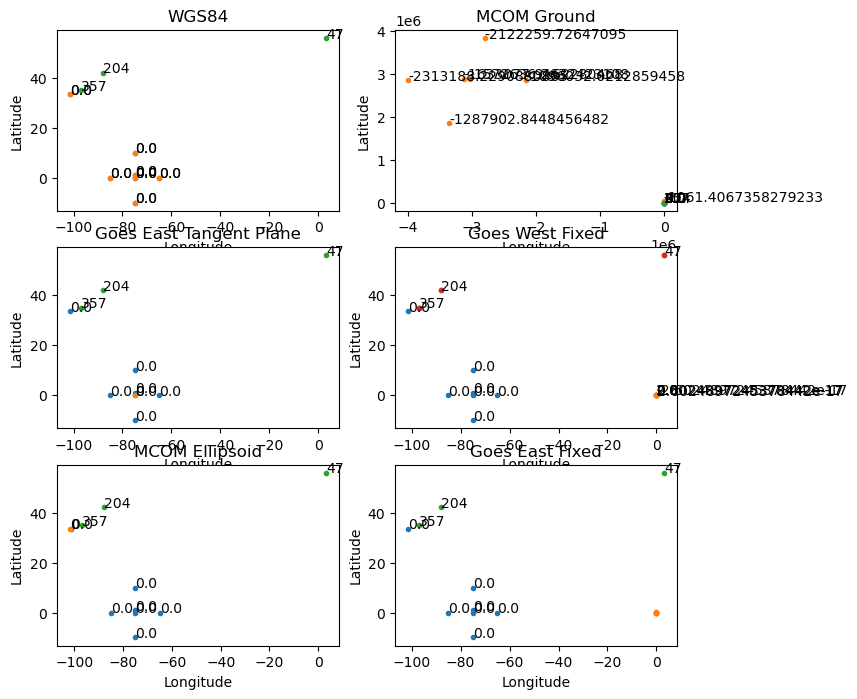

In [82]:
# Make the other five panels here
loc_lat = (np.array([  33.5,   1.0,   0.0,   0.0,   0.0,  10.0, -10.0]))
loc_lon = (np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0]))
loc_alt = (np.zeros_like(lat))
loc_lon5 = [-101.8803718553]
loc_lat5 = [33.5818617015]
loc_alt5 = [0]
loc_lon3 = [-75]
loc_lat3 = [0]
loc_alt3 = [0]
loc_lon6 = (x_goes_e)
loc_lat6 = (y_goes_e)
loc_alt6 = (z_goes_e)
loc_lat4 = (x_goes_w)
loc_lon4 = (y_goes_w)
loc_alt4 = (z_goes_w)
loc_lon2 = [-87.9376, -97.09029, 3.1883]
loc_lat2 = [42.0953, 35.0078, 55.9533]
loc_alt2 = [204, 357, 47]
loc_lon7 = (y_mcom_ground)
loc_lat7 = (x_mcom_ground)
loc_alt7 = (z_mcom_ground)

import matplotlib.pyplot as plt
n_rows, n_cols = 3, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,8))
axes[0,0].plot
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0]
axes[0,0].set_title('WGS84')
axes[0,0].plot(lon, lat, marker='.', linestyle='none')
axes[0,0].plot(loc_lon, loc_lat, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(lon, lat, alt):
    axes[0,0].text(tlon, tlat, tlabel)
for tlon, tlat, tlabel in zip(loc_lon, loc_lat, loc_alt):
    axes[0,0].text(tlon, tlat, tlabel)
axes[0,0].plot(loc_lon2, loc_lat2, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(loc_lon2, loc_lat2, loc_alt2):
    axes[0,0].text(tlon, tlat, tlabel)
    axes[0,0].plot

axes[0,1].plot
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
axes[0,1]
axes[0,1].set_title('MCOM Ground')
axes[0,1].plot(lon, lat, marker='.', linestyle='none')
axes[0,1].plot(loc_lon7, loc_lat7, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(lon, lat, alt):
    axes[0,1].text(tlon, tlat, tlabel)
for tlon, tlat, tlabel in zip(loc_lon7, loc_lat7, loc_alt7):
    axes[0,1].text(tlon, tlat, tlabel)
axes[0,1].plot(loc_lon2, loc_lat2, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(loc_lon2, loc_lat2, loc_alt2):
    axes[0,1].text(tlon, tlat, tlabel)
    axes[0,1].plot

axes[1,0].plot
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')
axes[1,0]
axes[1,0].set_title('Goes East Tangent Plane')
axes[1,0].plot(lon, lat, marker='.', linestyle='none')
axes[1,0].plot(loc_lon3, loc_lat3, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(lon, lat, alt):
    axes[1,0].text(tlon, tlat, tlabel)
for tlon, tlat, tlabel in zip(loc_lon3, loc_lat3, loc_alt3):
    axes[1,0].text(tlon, tlat, tlabel)
axes[1,0].plot(loc_lon2, loc_lat2, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(loc_lon2, loc_lat2, loc_alt2):
    axes[1,0].text(tlon, tlat, tlabel)
    axes[1,0].plot

axes[1,1].plot
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
axes[1,1]
axes[1,1].set_title('Goes West Fixed')
axes[1,1].plot(lon, lat, marker='.', linestyle='none')
axes[1,1].plot(loc_lon4, loc_lat4, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(lon, lat, alt):
    axes[1,1].text(tlon, tlat, tlabel)
for tlon, tlat, tlabel in zip(loc_lon4, loc_lat4, loc_alt4):
    axes[1,1].text(tlon, tlat, tlabel)
axes[1,1].plot(loc_lon2, loc_lat2, marker='.', linestyle='none')
axes[1,1].plot(loc_lon2, loc_lat2, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(loc_lon2, loc_lat2, loc_alt2):
    axes[1,1].text(tlon, tlat, tlabel)
    axes[1,1].plot
axes[2,0].plot
axes[2,0].set_xlabel('Longitude')
axes[2,0].set_ylabel('Latitude')
axes[2,0]
axes[2,0].set_title("MCOM Ellipsoid")
axes[2,0].plot(lon, lat, marker='.', linestyle='none')
axes[2,0].plot(loc_lon5, loc_lat5, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(lon, lat, alt):
    axes[2,0].text(tlon, tlat, tlabel)
for tlon, tlat, tlabel in zip(loc_lon5, loc_lat5, loc_alt5):
    axes[2,0].text(tlon, tlat, tlabel)
axes[2,0].plot(loc_lon2, loc_lat2, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(loc_lon2, loc_lat2, loc_alt2):
    axes[2,0].text(tlon, tlat, tlabel)
    axes[2,0].plot

axes[2,1].plot
axes[2,1].set_xlabel('Longitude')
axes[2,1].set_ylabel('Latitude')
axes[2,1]
axes[2,1].set_title('Goes East Fixed')
axes[2,1].plot(lon, lat, marker='.', linestyle='none')
axes[2,1].plot(loc_lon6, loc_lat6, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(lon, lat, alt):
    axes[2,1].text(tlon, tlat, tlabel)
axes[2,1].plot(loc_lon2, loc_lat2, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(loc_lon2, loc_lat2, loc_alt2):
    axes[2,1].text(tlon, tlat, tlabel)
    axes[2,1].plot


print("Not all the plots make sense or look correct. The MCOM ground and Goes W are in meters unlike the rest. Its because I had to convert to ECEF, while the other plots I just had to add the correct coordinates. This made the plots not able to plot the 3 other locations well.")


# BONUS! Make a 3D plot of all locations. 
# Try to imagine the curved earth surface on which they reside.
# This part is not graded, but might be useful to you.

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X, Y, Z, marker='o', linestyle='none') # original locations
ax.plot(locX, locY, locZ, marker='o', linestyle='none') # personal locations
ax.set_xlabel('ECEF X (m)')
ax.set_ylabel('ECEF Y (m)')
ax.set_zlabel('ECEF Z (m)')
# ax.set_aspect('equal')

**5.** Using the arrays you created in the previous assignment, create a `pcolormesh` plot of the data in geostationary coordinates from both the GOES East and GOES West positions. (15 pts.)

Text(0, 0.5, 'latitude (degrees)')

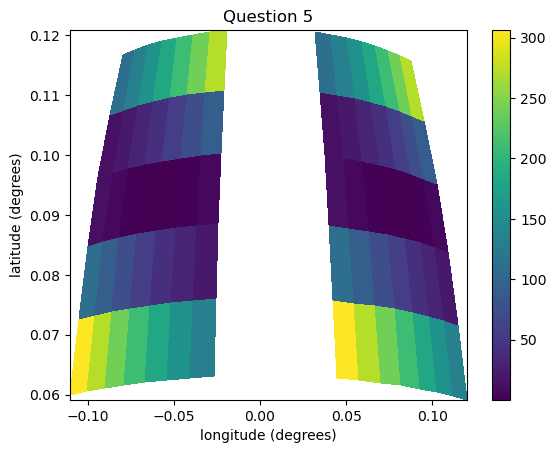

In [83]:


nlon = 7
nlat = 5
d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlat, nlon)
dlon, dlat = 5.0, 5.0
lat = ([-116.8803718553, -111.8803718553, -106.8803718553, -101.8803718553, -96.8803718553, -91.8803718553, -86.8803718553]) 
lon = ([23.5818617015, 28.5818617015, 33.5818617015, 38.5818617015, 43.5818617015])
lon2, lat2 = np.meshgrid(lat, lon)
alt = np.zeros_like(lat2)
latI, lonI, altI = geo.toECEF(lon2, lat2, alt)
westg = Goes_west.fromECEF(latI, lonI, altI)
eastg = Goes_East.fromECEF(latI, lonI, altI) 

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(westg[0], westg[1], d)
im = ax.pcolormesh(eastg[0], eastg[1], d)
plt.colorbar(im)

plt.title("Question 5")
#ax.scatter(latI, lonI, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

**6.** One thing we didn't do in the previous assignment was plot in a "traditional" map projection. We'll do that now with the Azimuthal Equidistant and Gnomonic projections, centered on MCOM, as defined below. The MapProjection class has the same to/from ECEF methods, and coordinates returned are in meters relative to the center point. (15 pts.)

If you're curious, you can peruse [the full list of projections](https://proj.org/operations/projections/index.html) to see how to define others.

Create a plot of the same data in each map projection, and set the axis limits to +/- 1600 km. Do you notice any differences in the two projections?

/var/folders/5h/yq8vxp4s0_bgqmys91lkfdd80000gn/T/ipykernel_2292/3428596523.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(q2, w2, d, shading="nearest")
/var/folders/5h/yq8vxp4s0_bgqmys91lkfdd80000gn/T/ipykernel_2292/3428596523.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(r, t, d, shading="nearest")


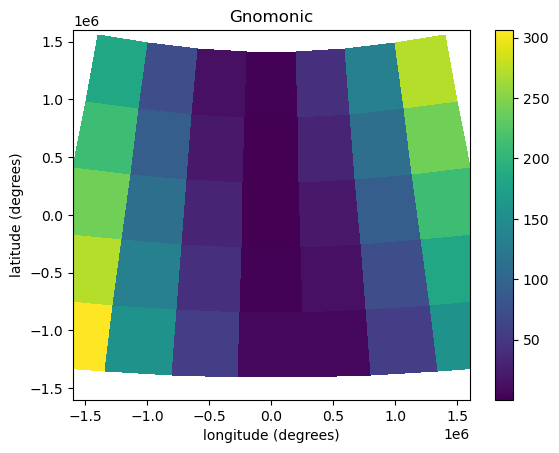

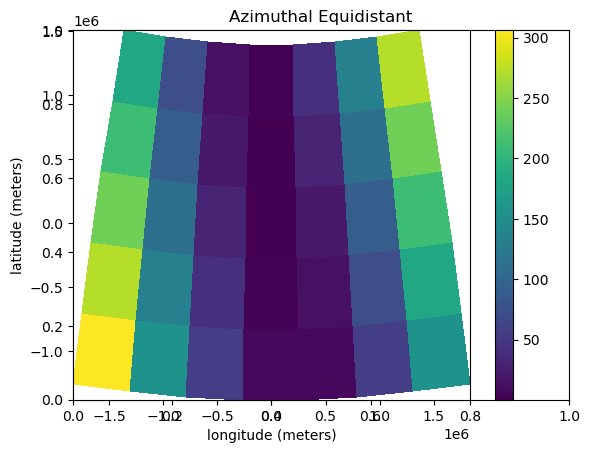

In [84]:
from coords import MapProjection
import numpy as np
nlon = 7
nlat = 5
d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlon, nlat)
dlon, dlat = 5.0, 5.0
aeqd = MapProjection(projection='aeqd', lon_0=mcom_lon, lat_0=mcom_lat)
gnom = MapProjection(projection='gnom', lon_0=mcom_lon, lat_0=mcom_lat)
lon = ([-116.8803718553, -111.8803718553, -106.8803718553, -101.8803718553, -96.8803718553, -91.8803718553, -86.8803718553])
lat = ([23.5818617015, 28.5818617015, 33.5818617015, 38.5818617015, 43.5818617015])
lat2, lon2 = np.meshgrid(lat, lon)
alt = np.zeros_like(lat2)
q, w, e3 = geo.toECEF(lon2, lat2, alt)
q1, w1, e1 = geo.toECEF(lon2, lat2, alt)
r, t, e4 = aeqd.fromECEF(q, w, e3)
q2, w2, e2 = gnom.fromECEF(q1, w1, e1)

fig = plt.figure()
ax.set_xlim(-1600000, 1600000)
ax.set_ylim(-1600000, 1600000)
ax = fig.add_subplot(111)
plt.title("Gnomonic")
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')
im = ax.pcolormesh(q2, w2, d, shading="nearest")
plt.colorbar(im)

fig = plt.figure()
ax.set_xlim(-1600000, 1600000)
ax.set_ylim(-1600000, 1600000)
plt.title("Azimuthal Equidistant")
ax = fig.add_subplot(111)
ax.set_xlabel('longitude (meters)')
ax.set_ylabel('latitude (meters)')
im = ax.pcolormesh(r, t, d, shading="nearest")
plt.colorbar(im)





Answer: Yes the two graphs are different. The Gnomonic is more stretched along the longitude axis and that the azimuthal equidistant is more stretched vertically as well. 